In [81]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

from sklearn.datasets import load_breast_cancer
heartdiseasedata = pd.read_csv("./heart_cleveland_upload.csv")
heartdiseasedata.rename(columns={'condition': 'class'}, inplace=True)
heartdiseasedata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [82]:
heartdiseasedata['class'].unique()

array([0, 1])

In [83]:
heartdiseasedata['class'].value_counts()

class
0    160
1    137
Name: count, dtype: int64

In [84]:
heartdiseasedata['class'].value_counts(normalize=True)

class
0    0.538721
1    0.461279
Name: proportion, dtype: float64

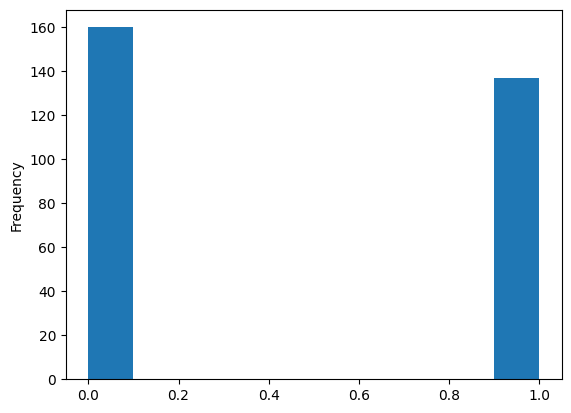

In [85]:
heartdiseasedata['class'].plot.hist();

In [86]:
heartdiseasedata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [87]:
# predictors vs class
y = heartdiseasedata['class']
X = heartdiseasedata.drop('class', axis=1) # axis=1 means dropping from the column axis

X_min_max = X.copy()
for col in X_min_max.columns:
    if pd.api.types.is_numeric_dtype(X_min_max[col]):
        X_min_max[col] = (X_min_max[col] - X_min_max[col].min()) / (X_min_max[col].max() - X_min_max[col].min())
X = X_min_max.copy()
X['dummy1'] = 0.0
X['dummy2'] = 0.0
X['dummy3'] = 0.0

In [88]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [89]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 237 samples for training and 60 samples for testing.


In [90]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',verbose=1,gamma='auto') # auto means, gamma = 1/nfeatures

In [91]:
svc.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 123
obj = -103.308219, rho = -0.102947
nSV = 127, nBSV = 117
Total nSV = 127


SVC(gamma='auto', verbose=1)

In [92]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



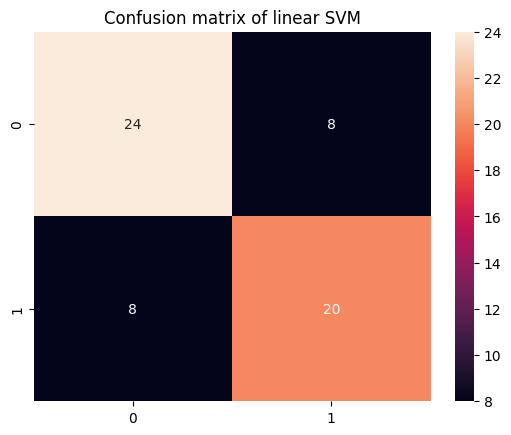

In [93]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       128
           1       0.86      0.81      0.83       109

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



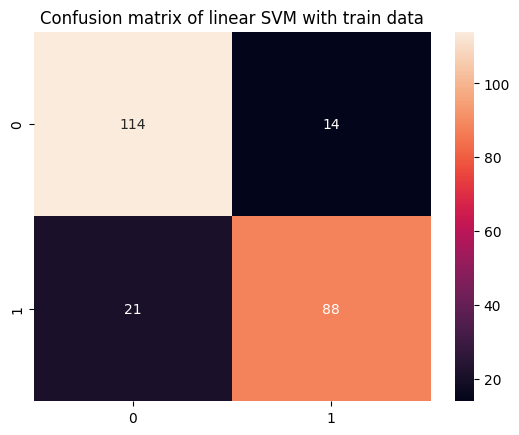

In [94]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [95]:
svc.get_params()
print(svc.n_support_)

[64 63]


In [96]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [97]:
print(decision_function)

[ 0.8504814   0.95050441 -0.53599482 -1.76432963  0.23186782 -0.92582042
  1.79257438  0.85563835  0.59979418 -0.69956488 -0.96491231  0.3962271
 -0.34752517 -1.65978565 -1.70248325  0.39455417  0.60797477 -1.16762008
  0.89324697 -1.32840424  0.85846674  0.31884901 -1.21435587 -1.35667339
 -0.87959081  1.27940214  0.97955555  1.47657138 -0.1546159   0.62200266
  0.35084225  0.74049413 -1.00010879 -0.82861529 -0.41253198  1.57088834
  0.4837579  -1.41786167  1.19932233 -1.04509127 -1.30954641  0.43990331
  0.61582712 -0.35143112 -1.2413424   1.57231859 -1.16890878 -0.06697575
 -0.35083551 -1.40006367 -0.47821396  0.92749706 -0.59478101  0.16534071
  1.44118897 -0.02769203 -0.81556606  1.21309561 -0.29340264 -0.07337104]


In [98]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model-rbf/support_vectors_rbf.txt","w")
dual_coeff=open("../data-kernel-model-rbf/dual_coeff_rbf.txt","w")
intercept=open("../data-kernel-model-rbf/intercept_rbf.txt","w")
xtestSample="../data-kernel-model-rbf/xtest_rbf.txt"
ytestSample="../data-kernel-model-rbf/ytest_rbf.txt"
ytestClassificationScore="../data-kernel-model-rbf/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  auto
svc.degree:  3
